In [42]:
using ComputationalHeatTransfer
using LaTeXStrings
using Revise
using LinearAlgebra
using DifferentialEquations
using Interpolations
using JLD2
using Plots
pyplot()  

cd(dirname(pwd()))
cd("src") 
includet("OneDOHP.jl")
using ..OneDOHP

## turned on boiling

# the plate code initialization

### Physical parameters

In [2]:
ρ = 2700;
c = 8.97e02;
k = 1.67e02;
d = 2e-3;
params = HeatConductionParameters(ρ,c,k,thickness=d)

HeatConductionParameters(2700.0, 897.0, 167.0, 6.895412692514142e-5, 0.002)

### Geometry parameters

In [3]:
inch = 2.54e-2;
Lx = 0.1524;
Ly = 0.0648;

In [4]:
xlim = (-Lx/2,Lx/2) .*1.0
ylim = (-Ly/2,Ly/2) .*1.0
Δx, Δt = setstepsizes(params.α,gridPe=8.0,fourier=0.3)


(0.0005516330154011314, 0.001323919236962715)

### Set up the evaporator and condenser

In [5]:
eb1 = Rectangle(0.5inch,1.0inch,1.5*Δx)
Te = RigidTransform((0.7inch,-0.0),0.0)
Te(eb1)

eb2 = Rectangle(0.5inch,1.0inch,1.5*Δx)
Te = RigidTransform((-0.7inch,-0.0),0.0)
Te(eb2)

cb1 = Rectangle(0.5inch*0.9,Ly*0.9/2,1.5*Δx)
Tc = RigidTransform((-2.5inch,-0.0),0.0)
Tc(cb1)

cb2 = Rectangle(0.5inch*0.9,Ly*0.9/2,1.5*Δx)
Tc = RigidTransform((2.5inch,-0.0),0.0)
Tc(cb2)

qe = 15500.0
hc = 1500.0
Tc = 0.0

eparams1 = PrescribedHeatFluxRegion(qe,eb1);
eparams2 = PrescribedHeatFluxRegion(qe,eb2);
cparams1 = PrescribedHeatModelRegion(hc,Tc,cb1);
cparams2 = PrescribedHeatModelRegion(hc,Tc,cb2);

### Set up the OHP

In [6]:
ds = 1.5Δx
nturn = 16
#pitch = 0.125
length_ohp = 46.25*1e-3
height = 133.83*1e-3
gap = d
pitch = length_ohp/(2*nturn+1)
x0, y0 = height/2, length_ohp/2
x, y, xf, yf = ComputationalHeatTransfer.construct_ohp_curve(nturn,pitch,height,gap,ds,x0,y0,false,false,3pi/2)
ohp = BasicBody(x,y)

plot(ohp,fillalpha=0,linecolor=:blue,xlims=xlim,ylims=ylim,framestyle = :box)


LoadError: [91mUndefVarError: plot not defined[39m

In [7]:
ohpgeom = ComputationalHeatTransfer.LineSourceParams(ohp)
qtmp = zeros(numpts(ohp));

### Create the system

In [8]:
sys = HeatConduction(params,Δx,xlim,ylim,Δt,qline=ohpgeom,qflux=[eparams1,eparams2],qmodel=[cparams1,cparams2])
#sys = HeatConduction(params,Δx,xlim,ylim,Δt,qline=ohpgeom)

Unbounded Heat conduction system on a grid of size 280 x 120 and 0 static immersed points


### Initialize state, and create the integrator

In [9]:
u0 = newstate(sys)
tspan = (0.0,1.0)
integrator = init(u0,tspan,sys);
Tn = temperature(integrator);

### Set up values for the OHP heat flux per unit length and advance the solution

In [10]:
fill!(qtmp,-0.0)
set_linesource_strength!(sys,qtmp)

Unbounded Heat conduction system on a grid of size 280 x 120 and 0 static immersed points


### Time marching

In [11]:
num = 1000
ΔN = 100


Thist=[]

@time for i = 1:num
    Tn = ADI_timemarching!(Tn,sys,Δt)
    
    if mod(i,ΔN) == 0
        push!(Thist,deepcopy(Tn))
    end
end

 15.314012 seconds (3.02 M allocations: 13.259 GiB, 8.48% gc time)


In [12]:
typeof(sys.qline[1].arccoord)

ScalarData{5601,Float64,Array{Float64,1}}

### Plotting temperature contours

In [13]:
plot(Tn,sys.grid,legend=true,color=cgrad(:RdBu,rev=true),line_z=0,xlabel="x [m]",ylabel="y [m]",title=L"T \quad [\mathrm{K}]")

LoadError: [91mUndefVarError: cgrad not defined[39m

### Plot the temperature along the OHP channel

In [14]:
# plot(sys.qline[1].arccoord,temperature_linesource(integrator),xlabel=L"\xi",ylabel=L"T - T_0")

# OHP inner part

In [15]:
nondi_Q_to_Q = 1.35E+02
t_to_nondi_t = 2.83E-01
function di_T_to_nondi_T(di_T;T0=295.0) 
    
    (di_T+T0)/T0
    
end



di_T_to_nondi_T (generic function with 1 method)

In [16]:
    ω = sqrt(2.45E+03);
    ℘L = 2.05E+05;
    k = 0.106024683

    θinitial=1.0
    θc = 1.0; # useless

    Hwc = 0.0; #not useful later on. H between wall and condenser, 
#     Hₗ   =  1600.0; # liquid wall heat transfer coeffcient
    Hₗ   =  1.01E+03; # liquid wall heat transfer coeffcient for static fluids
    Hδ  = 4.65E+02;


In [17]:
    d = 6.56e-3 # dimensionless diameter
    L = 34.35  # total length of the pipe when streched to a 1D pipe
    L2D = 1.0 # the actual length of the bended pipe in the real world
    angle = 0*pi/2 # inclination angle 
    closedornot = true

true

In [18]:
    nucleatenum = 256
    Xstations = sort(rand(nucleatenum).*L);
#     boilingΔt = 0.05

In [19]:
tube = Tube(d,L,L2D,angle,closedornot);

LoadError: [91mUndefVarError: Tube not defined[39m

In [20]:
# useless
Xe = map(tuple, [1.0], [3.0])
We = [0.0]
evap = Evaporator(Xe,We);

LoadError: [91mUndefVarError: Evaporator not defined[39m

In [21]:
# useless
Xc = map(tuple, [0.0,3.0], [1.0,4.0])
cond = Condenser(θc,Xc,Hwc);

LoadError: [91mUndefVarError: Condenser not defined[39m

In [22]:
numofX=32
Xps = sort(rand(2*numofX).*L);
# Xps = LinRange(0.0,L,2*numofX+1);Xps = Xps[1:end-1];
Xp1s = Xps[1:2:end];
Xp2s = Xps[2:2:end];

dXdt0 = map(tuple,0*Xp1s,0*Xp2s)
X0 = map(tuple,Xp1s,Xp2s);


In [23]:
# numofX=47
# chargeratio = 0.45
# # Xps = sort(rand(2*numofX).*L);
# Xp1s = LinRange(0.0,L,numofX+1);Xp1s = Xp1s[1:end-1];
# Xp2s = mod.((deepcopy(Xp1s) .+ L/numofX * chargeratio),L)
# # Xp1s = Xps[1:2:end];
# # Xp2s = Xps[2:2:end];

# X0 = map(tuple,Xp1s,Xp2s);
# # X0[1] = (1e-2,X0[1][2]); 
# X0[1] = (L-1e-2,X0[1][2]); 
# dXdt0 = map(tuple,0*Xp1s,0*Xp2s);

In [24]:
# X0=[(33.0,34.0)]
# dXdt0 =[(0.0,0.0)]

In [25]:
N=numpts(ohp)

ρ = 102.593344 # density ratio
Xarrays,θarrays = constructXarrays(X0,N,θinitial,L)
liquids=Liquid(Hₗ,ρ,ω,℘L,X0,dXdt0,Xarrays,θarrays);

LoadError: [91mUndefVarError: constructXarrays not defined[39m

In [26]:
# P = [1.0,1.0,1.0,1.0,1.0]; # closed end

γ = 1.4;
# Hδ = 4.64E+02
P = 0*zeros(length(X0)) .+ 1.0;
δ = 0*zeros(length(X0)) .+ 2.78E-02;
vapors=Vapor(γ,Hδ,P,δ);

LoadError: [91mUndefVarError: Vapor not defined[39m

In [27]:
α = 1.154e-5 # nondimensional thermal diffusivity = (αₐ d^2) / (νₗ height^2)
# Xwallarray,θwallarray = constructXarrays(L,N,θinitial)
Xwallarray,θwallarray = constructXarrays(sys.qline[1].arccoord,L,θinitial)
θwallarray = di_T_to_nondi_T(temperature_linesource(integrator));

wall = Wall(α,Δt,Xstations,Xwallarray,θwallarray);

LoadError: [91mUndefVarError: constructXarrays not defined[39m

In [28]:
sys0_nomapping = PHPSystem_nomapping(tube,evap,cond,liquids,vapors,wall);
θ_interp_walltoliquid, θ_interp_liquidtowall, H_interp_liquidtowall, P_interp_liquidtowall = sys_interpolation(sys0_nomapping)
mapping = Mapping(θ_interp_walltoliquid, θ_interp_liquidtowall, H_interp_liquidtowall, P_interp_liquidtowall);

LoadError: [91mUndefVarError: PHPSystem_nomapping not defined[39m

In [29]:
sys0 = PHPSystem(tube,evap,cond,liquids,vapors,wall,mapping);

LoadError: [91mUndefVarError: PHPSystem not defined[39m

### construct state vector U

In [30]:
Lvaporplug = XptoLvaporplug(X0,sys0.tube.L,sys0.tube.closedornot)
M = nondi_PtoD(P) .* Lvaporplug
# M = P.^(1/γ).* Lvaporplug


u=[XMδtovec(X0,dXdt0,M,δ); liquidθtovec(sys0.liquid.θarrays)];

LoadError: [91mUndefVarError: sys0 not defined[39m

In [31]:
cb_boiling =  DiscreteCallback(boiling_condition,boiling_affect!)
# cb_boiling =  PeriodicCallback(boiling_affect!,0.01*t_to_nondi_t)
cb_merging =  DiscreteCallback(merging_condition,merging_affect!)

cbst = CallbackSet(cb_boiling,cb_merging);

LoadError: [91mUndefVarError: boiling_condition not defined[39m

# combine inner tube and plate together

In [32]:
tspan = (0.0, 300.0);
dt_record = tspan[2] /150;

tstep=1e-3

N_iter = 1
# tstep_plate = tstep/N_iter
# dt_record = tstep

1

In [33]:
u0 = newstate(sys)
integrator_plate = init(u0,tspan,sys)
Tplate = temperature(integrator_plate);

In [34]:
p = sys0
u=[XMδtovec(X0,dXdt0,M,δ); liquidθtovec(sys0.liquid.θarrays)];
prob = ODEProblem(ODE_innertube, u, tspan, p)
integrator_tube = init(prob, RK4(),save_everystep=false, dt=tstep*t_to_nondi_t, callback=cbst);

LoadError: [91mUndefVarError: sys0 not defined[39m

In [35]:
plate_hist = []
tube_hist  = []

currentsys = integrator_tube.p
currentsys = getcurrentsys(integrator_tube.u,currentsys);

LoadError: [91mUndefVarError: integrator_tube not defined[39m

In [36]:
# integrator_plate = plate_hist[end-3]
# integrator_tube = tube_hist[end-3]

# currentsys = integrator_tube.p
# currentsys = getcurrentsys(integrator_tube.u,currentsys);

# tspan = (integrator_plate.t, integrator_plate.t + 1.0);
# dt_record = 0.01

In [37]:
# tspan = (integrator_plate.t, integrator_plate.t + 0.2);
# dt_record = tstep

In [38]:

@time for t in tspan[1]:tstep:tspan[2]
    

#   for j in 1:N_iter
        currentsys.wall.θarray = di_T_to_nondi_T(temperature_linesource(integrator_plate))
        currentsys = getcurrentsys(integrator_tube.u,currentsys)


        nondi_qtmp = sys_to_heatflux(currentsys)
        qtmp = nondi_Q_to_Q*nondi_qtmp
        set_linesource_strength!(sys,qtmp)


        Tplate = ADI_timemarching!(Tplate,sys,tstep)
#     end
    integrator_plate.t += tstep
    
    # reinitialize the integrator_tube to avoid some mysterious problems
    prob = ODEProblem(ODE_innertube, deepcopy(integrator_tube.u), (integrator_plate.t*t_to_nondi_t-tstep*t_to_nondi_t,integrator_plate.t*t_to_nondi_t), currentsys)
    integrator_tube = init(prob, RK4(), callback=cbst, dt=tstep*t_to_nondi_t);
    step!(integrator_tube);
#     @time step!(integrator_tube, tstep*t_to_nondi_t)

    if (mod(integrator_plate.t,dt_record) < 1e-6) || (mod(-integrator_plate.t,dt_record) < 1e-6)
        push!(plate_hist,deepcopy(integrator_plate)); 
        push!(tube_hist,deepcopy(integrator_tube));
        println(integrator_plate.t)
    end
    
end

LoadError: [91mUndefVarError: currentsys not defined[39m

In [39]:
        push!(plate_hist,deepcopy(integrator_plate)); 
        push!(tube_hist,deepcopy(integrator_tube));
        println(integrator_plate.t)

LoadError: [91mUndefVarError: integrator_tube not defined[39m

In [40]:
sysfinal = []
for i = 1:length(tube_hist)
    push!(sysfinal, deepcopy(getcurrentsys(tube_hist[i].u,tube_hist[i].p)))
end

In [41]:
# plot(ohp,fillalpha=0,line_z=temperature_linesource(integrator_plate))

In [88]:
maximum(temperature(plate_hist[end-5])[:])

7.115167245198905

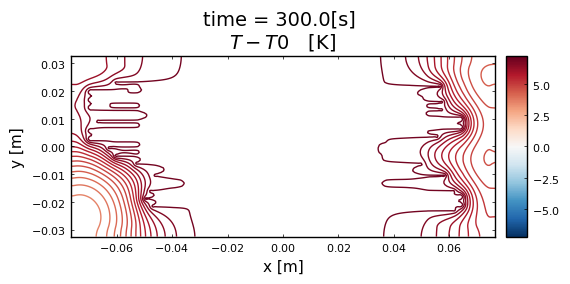

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
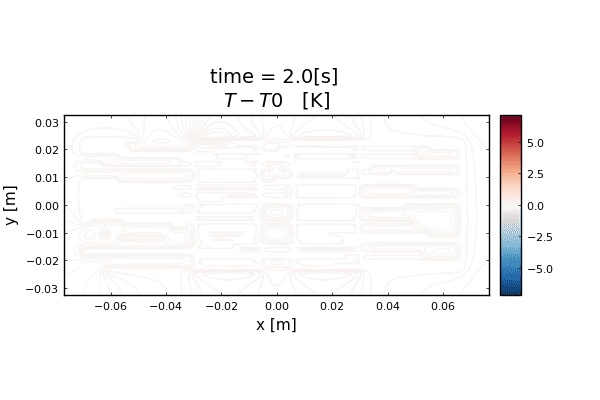

In [89]:
Tmax = maximum(temperature(plate_hist[end-1])[:])
Tmin = -maximum(temperature(plate_hist[end-1])[:])
@gif for i = 1:1:length(plate_hist)
# @gif     for i = 1:1:1  
    
plot(temperature(plate_hist[i]),sys.grid,legend=true,color=cgrad(:RdBu,rev=true),clim=(Tmin,Tmax),line_z=0,xlabel="x [m]",ylabel="y [m]",title=string("time = ", round(plate_hist[i].t, digits=2), "[s] \n",  L"T - T0 \quad [\mathrm{K}]"))
end

In [90]:
minimum(temperature(plate_hist[end]))

3.3216732786078436

In [91]:
length(plate_hist)

151

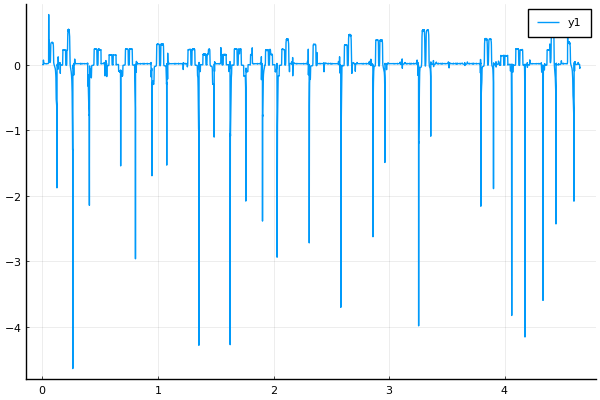

In [92]:
plot(sys.qline[1].arccoord,sys_to_heatflux(sysfinal[end]))

In [43]:
i = 1
    Htmp = sys_to_Harray(sysfinal[i])
    plot(ohp,fillalpha=0,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,xlabel="x ",ylabel="y ",border=:none,axis=nothing)
# end

LoadError: [91mBoundsError: attempt to access 0-element Array{Any,1} at index [1][39m

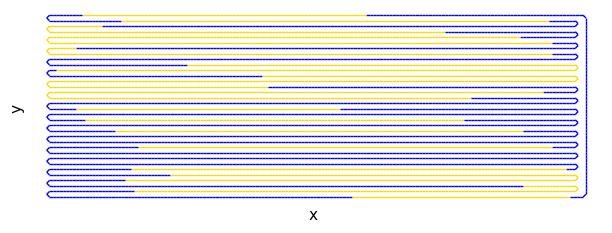

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
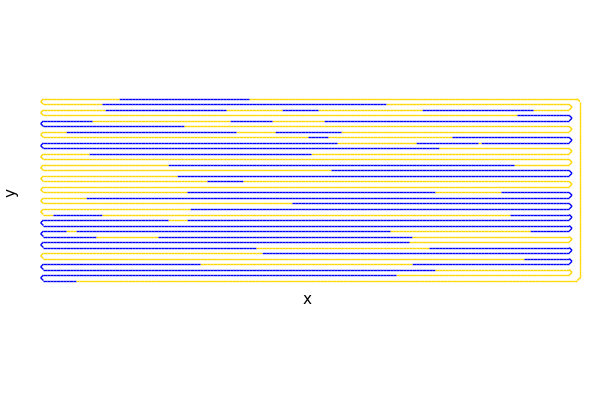

In [93]:
@gif for i=1:10:length(sysfinal)
    Htmp = sys_to_Harray(sysfinal[i])
    plot(ohp,fillalpha=0,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,xlabel="x ",ylabel="y ",border=:none,axis=nothing)
end

# plot the OHP

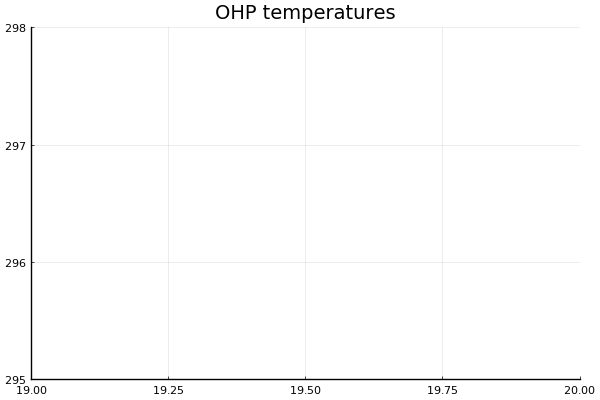

In [94]:
plot(sysfinal[60],xlim=(19.0,20.0),ylim=(295.0,298.0))

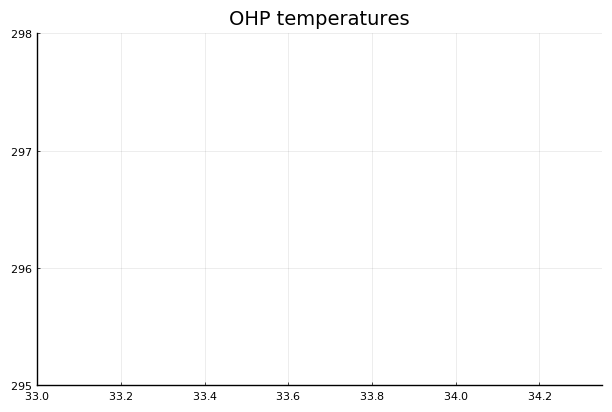

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
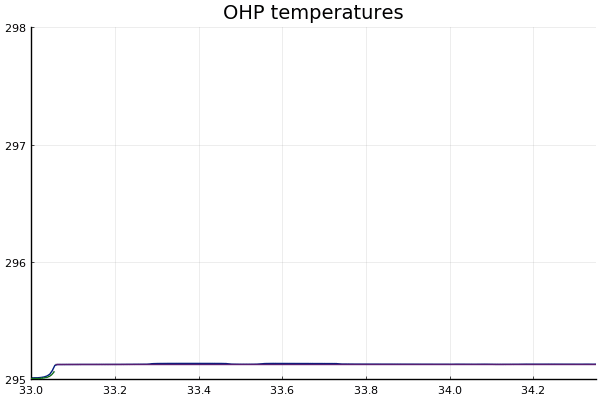

In [95]:
@gif for ii=1:length(sysfinal)
     plot(sysfinal[ii],xlim=(33.0,34.35),ylim=(295.0,298.0))
end

In [96]:
sysfinal[end].mapping.H_interp_liquidtowall[8.5:0.01:8.7]

21-element Array{Float64,1}:
 1010.0
 1010.0
 1010.0
 1010.0
 1010.0
 1010.0
 1010.0
 1010.0
 1009.9999999999999
 1010.0
 1010.0
 1009.9999999999999
 1010.0
 1010.0
 1010.0
 1010.0
 1010.0
 1010.0
 1010.0
 1010.0
 1010.0

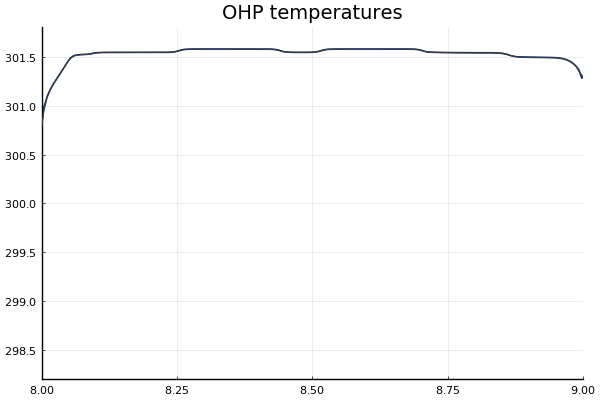

In [97]:
plot(sysfinal[end-30],plottype="T",xlim=(8.0,9.0))

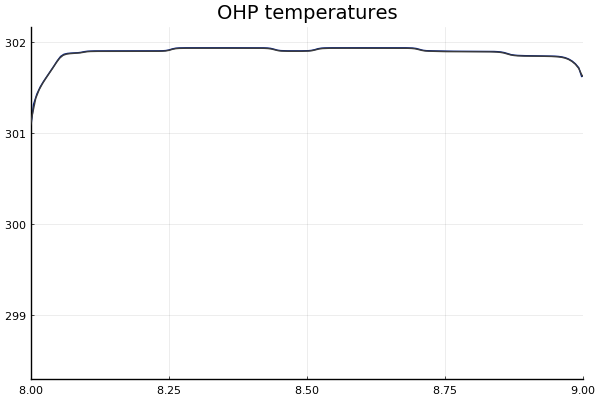

In [98]:
plot(sysfinal[end-3],plottype="T",xlim=(8.0,9.0))

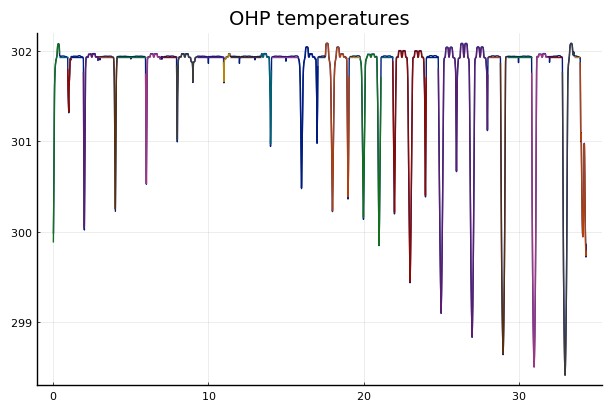

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
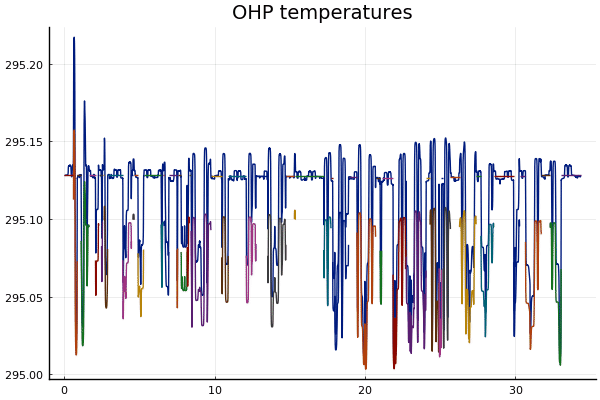

In [99]:
@gif for ii=1:length(sysfinal)
    plot(sysfinal[ii])
end

In [100]:
# plate_hist, integrator_plate = load("plate_OHP_boiling.jld2", "plate_hist",  "integrator_plate")

In [101]:
# tube_hist, integrator_tube = load("tube_OHP_boiling.jld2", "tube_hist",  "integrator_tube")

In [102]:
save("plate_OHP.jld2", "plate_hist", plate_hist, "integrator_plate", integrator_plate)

In [103]:
save("tube_OHP.jld2", "tube_hist", tube_hist, "integrator_tube",integrator_tube)

In [ ]:
# @gif for i=1:5:length(sysfinal)
#     Htmp = sys_to_Harray(sysfinal[i])
#     plot(ohp,fillalpha=0,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,xlabel="x ",ylabel="y ",border=:none,axis=nothing)
# end

In [ ]:
sys_interpolation(integrator_tube.p)

In [ ]:

@time for t in tspan[1]:tstep:tspan[1]
    


    currentsys.wall.θarray = di_T_to_nondi_T(temperature_linesource(integrator_plate))
    currentsys = getcurrentsys(integrator_tube.u,currentsys)
    
    
    nondi_qtmp = sys_to_heatflux(currentsys)
    qtmp = nondi_Q_to_Q*nondi_qtmp
    set_linesource_strength!(sys,qtmp)
    

    Tplate = ADI_timemarching!(Tplate,sys,tstep)
    integrator_plate.t += tstep
    
    # reinitialize the integrator_tube to avoid some mysterious problems
    prob = ODEProblem(ODE_innertube, deepcopy(integrator_tube.u), (integrator_plate.t*t_to_nondi_t-tstep*t_to_nondi_t,integrator_plate.t*t_to_nondi_t), currentsys)
    integrator_tube = init(prob, ImplicitEuler(), callback=cbst, dt=tstep*t_to_nondi_t);
    solve!(integrator_tube);
#     @time step!(integrator_tube, tstep*t_to_nondi_t)

    if (mod(integrator_plate.t,dt_record) < 1e-6) || (mod(-integrator_plate.t,dt_record) < 1e-6)
        push!(plate_hist,deepcopy(integrator_plate)); 
        push!(tube_hist,deepcopy(integrator_tube));
        println(integrator_plate.t)
    end
    
end

In [ ]:
systest = getcurrentsys(integrator_tube.u,currentsys)
systest.liquid.dXdt[10:20]

In [ ]:
sysfinal[end].vapor.P[10:20]

In [ ]:
Xp = sysfinal[end].liquid.Xp
L = sysfinal[end].tube.L
closedornot = sysfinal[end].tube.closedornot
Xpvapor = getXpvapor(Xp,L,closedornot)

In [ ]:
tube_hist

In [ ]:
integrator_tube        = tube_hist
integrator_plate       = plate_hist[end-1]

In [ ]:
plate_hist_test = []
tube_hist_test  = []

In [ ]:
@time for t in tspan[1]:tstep:tspan[2]
    


    currentsys.wall.θarray = di_T_to_nondi_T(temperature_linesource(integrator_plate))
    currentsys = getcurrentsys(integrator_tube.u,currentsys)
    
    
    nondi_qtmp = sys_to_heatflux(currentsys)
    qtmp = nondi_Q_to_Q*nondi_qtmp
    set_linesource_strength!(sys,qtmp)
    

    Tplate = ADI_timemarching!(Tplate,sys,tstep)
    integrator_plate.t += tstep
    
    # reinitialize the integrator_tube to avoid some mysterious problems
    prob = ODEProblem(ODE_innertube, deepcopy(integrator_tube.u), (integrator_plate.t*t_to_nondi_t-tstep*t_to_nondi_t,integrator_plate.t*t_to_nondi_t), currentsys)
    integrator_tube = init(prob, VCAB3(), callback=cbst, dt=tstep*t_to_nondi_t);
    solve!(integrator_tube);
#     @time step!(integrator_tube, tstep*t_to_nondi_t)

        push!(plate_hist_test,deepcopy(integrator_plate)); 
        push!(tube_hist_test,deepcopy(integrator_tube));
        println(integrator_plate.t)

    
end

In [ ]:
0.1*5

In [ ]:
sysfinal[end-1].liquid.Xp